### This notebook is dedicated for EDA assignment of Kecerdasan Buatan Course Universitas Indonesia
Author : Fadhil Umar  
NPM : 2006529436

In [1]:
# Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## German Credit Risks Data Analysis
Our task is to classify the quality of people described by a set of attributes as good or bad credit risks.    
Types :  **Binary Classification**  
Data types : **Mixed**  
Data source : **Publicly available dataset**  
Links : [German Credit Data](https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data)  

**Additional information** :  
The dataset provided comes in two types,  the original dataset, in the form provided by Prof. Hofmann, contains categorical/symbolic attributes and is in the file "german.data".

The dataset also includes a version ("german.data-numeric") that has been preprocessed for algorithms that require numerical attributes. We'll initially work with the original dataset and refer to the preprocessed version if needed.  


### 1. Data Preparation  
the original dataset is given in .data format, we will use pandas 'read_csv' to read into dataframe.  
**IMPORTANT** : Make sure the data file **german.data** is in the same directory as the notebook.

In [2]:
# Read .data file using read_csv and set delimiter to ' '
dfdata = pd.read_csv('german.data', delimiter=' ', header=None)

In [3]:
dfdata.head(5)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


The original dataset lacks column headers, and categorical data is encoded using a combination of attribute numbers and label encoding. We will transform the dataset by adding meaningful column names and converting the encoded data into a more intuitive format for improved analysis. We will use the file **german.docs** as our reference.

In [4]:
# Dictionary to convert data to a more intuituve format
cols_name = {
    0:'status', 
    1:'duration',
    2:'history',
    3:'purpose',
    4:'amount',
    5:'savings',
    6:'employment',
    7:'installment_rate',
    8:'marriage_sex',
    9:'guarantor',
    10:'residence',
    11:'property',
    12:'age',
    13:'concurrent',
    14:'housing',
    15:'existing_credits',
    16:'job',
    17:'liability',
    18:'telephone',
    19:'foreign',
    20:'target'
}

status_pair = {
    'A11':'< 0 DM', 
    'A12':'0 - 200 DM', 
    'A13':'>= 200 DM', 
    'A14':'no account'
}

history_pair = {
    'A30':'no credits taken', 
    'A31':'all credits paid', 
    'A32':'existing credits paid', 
    'A33':'past delay', 
    'A34':'critical account'
}

purpose_pair = {
    'A40' : 'car (new)',
    'A41' : 'car (used)',
    'A42' : 'furniture/equipment',
    'A43' : 'radio/television',
    'A44' : 'domestic appliances',
    'A45' : 'repairs',
    'A46' : 'education',
    'A47' : 'vacation',
    'A48' : 'retraining',
    'A49' : 'business',
    'A410' : 'others'
}

savings_pair = {
    'A61' : '< 100 DM',
    'A62' : '100 - 500 DM',
    'A63' : '500 - 1000 DM',
    'A64' : '>= 1000 DM',
    'A65' : 'unknown/ no savings account'
}

employment_pair = {
    'A71' : 'unemployed',
    'A72' : '< 1 year',
    'A73' : '1 - 4 years',
    'A74' : '4 - 7 years',
    'A75' : '>= 7 years'
}

marriage_sex_pair = {
    'A91' : 'male-divorced/separated',
    'A92' : 'female-divorced/separated/married',
    'A93' : 'male-single',
    'A94' : 'male-married/widowed',
    'A95' : 'female-single'
}

guarantor_pair = {
    'A101' : 'none',
    'A102' : 'co-applicant',
    'A103' : 'guarantor'
}

property_pair = {
    'A121' : 'real estate',
    'A122' : 'life insurance',
    'A123' : 'other',
    'A124' : 'unknown'
}

concurrent_pair = {
    'A141' : 'bank',
    'A142' : 'stores',
    'A143' : 'none'
}

housing_pair = {
    'A151' : 'rent',
    'A152' : 'own',
    'A153' : 'free'
}

job_pair = {
    'A171' : 'unemployed',
    'A172' : 'unskilled',
    'A173' : 'skilled',
    'A174' : 'executive'
}

telephone_pair = {
    'A191' : 'none',
    'A192' : 'yes'
}

foreign_pair = {
    'A201' : 'yes',
    'A202' : 'no'
}

cols_dict = [status_pair, history_pair, purpose_pair, 
             savings_pair, employment_pair, marriage_sex_pair, 
             guarantor_pair, property_pair, concurrent_pair, 
             housing_pair, job_pair, telephone_pair, foreign_pair]

In [5]:
# Rename the column name
dfdata.rename(cols_name, axis=1, inplace=True)

In [6]:
# Check misisng values and data types of each column
dfdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status            1000 non-null   object
 1   duration          1000 non-null   int64 
 2   history           1000 non-null   object
 3   purpose           1000 non-null   object
 4   amount            1000 non-null   int64 
 5   savings           1000 non-null   object
 6   employment        1000 non-null   object
 7   installment_rate  1000 non-null   int64 
 8   marriage_sex      1000 non-null   object
 9   guarantor         1000 non-null   object
 10  residence         1000 non-null   int64 
 11  property          1000 non-null   object
 12  age               1000 non-null   int64 
 13  concurrent        1000 non-null   object
 14  housing           1000 non-null   object
 15  existing_credits  1000 non-null   int64 
 16  job               1000 non-null   object
 17  liability      

There are no missing values in our data

In [7]:
# Get the column with object data types and convert its value 
obj_cols = dfdata.select_dtypes(include=['object']).columns

for column, dict in zip(obj_cols, cols_dict):
    dfdata[column].replace(dict, inplace=True)

# Convert target data to match problem description
dfdata['target'].replace({2:0}, inplace=True)

There are still some ordinal categorical variable that is **installment_rate**, and **existing_credits**
we will also replace the value with a more intuitive format.

**Ordinal columns** 
1. **installment_rate**  
**1** : > 35%, **2** : 25% - 35%, **3**: 20% - 25%, **4** : < 20%  
2. **existing_credits**  
**1** : 1, **2** : 2 or 3, **3**: 4 or 5, **4** : 6 and above

In [8]:
# dict for reformating
installment_rate_pair = {
    1 : '> 35%', 
    2 : '25% - 35%', 
    3 : '20% - 25%', 
    4 : '< 20%'
}

existing_credits_pair = {
    1 : '1', 
    2 : '2 or 3', 
    3 : '4 or 5', 
    4 : '6 and above'
}

In [9]:
dfdata['installment_rate'].replace(installment_rate_pair, inplace=True)
dfdata['existing_credits'].replace(existing_credits_pair, inplace=True)

In [10]:
# Cleaned data
dfdata.head()

,status,duration,history,purpose,amount,savings,employment,installment_rate,marriage_sex,guarantor,...,property,age,concurrent,housing,existing_credits,job,liability,telephone,foreign,target
0,< 0 DM,6,critical account,radio/television,1169,unknown/ no savings account,>= 7 years,< 20%,male-single,none,...,real estate,67,none,own,2 or 3,skilled,1,yes,yes,1
1,0 - 200 DM,48,existing credits paid,radio/television,5951,< 100 DM,1 - 4 years,25% - 35%,female-divorced/separated/married,none,...,real estate,22,none,own,1,skilled,1,none,yes,0
2,no account,12,critical account,education,2096,< 100 DM,4 - 7 years,25% - 35%,male-single,none,...,real estate,49,none,own,1,unskilled,2,none,yes,1
3,< 0 DM,42,existing credits paid,furniture/equipment,7882,< 100 DM,4 - 7 years,25% - 35%,male-single,guarantor,...,life insurance,45,none,free,1,skilled,2,none,yes,1
4,< 0 DM,24,past delay,car (new),4870,< 100 DM,1 - 4 years,20% - 25%,male-single,none,...,unknown,53,none,free,2 or 3,skilled,2,none,yes,0


After we prepare the data, we can proceed to our initial analysis  
first of all, we will check the behaviour of numerical and categorical data as well as the target distribution

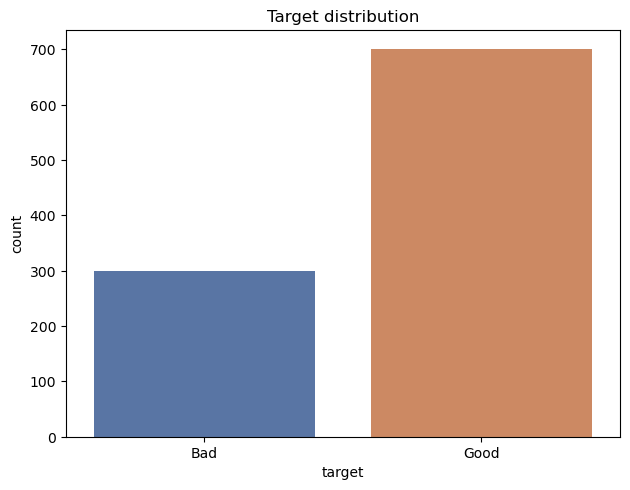

In [11]:
sns.countplot(data=dfdata, x='target', palette='deep')
plt.tight_layout()
plt.title('Target distribution')
plt.xticks([0, 1], ['Bad', 'Good']) 
plt.show()

In [12]:
dfdata['target'].value_counts()

1    700
0    300
Name: target, dtype: int64

There are **quite imbalance distribution** towards a **good credit risks** with **70%** of whole data are considered good risks

In [13]:
dfdata.select_dtypes(include='integer').describe()

,duration,amount,residence,age,liability,target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.845000,35.546000,1.155000,0.700000
std,12.058814,2822.736876,1.103718,11.375469,0.362086,0.458487
min,4.000000,250.000000,1.000000,19.000000,1.000000,0.000000
25%,12.000000,1365.500000,2.000000,27.000000,1.000000,0.000000
50%,18.000000,2319.500000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,42.000000,1.000000,1.000000
max,72.000000,18424.000000,4.000000,75.000000,2.000000,1.000000


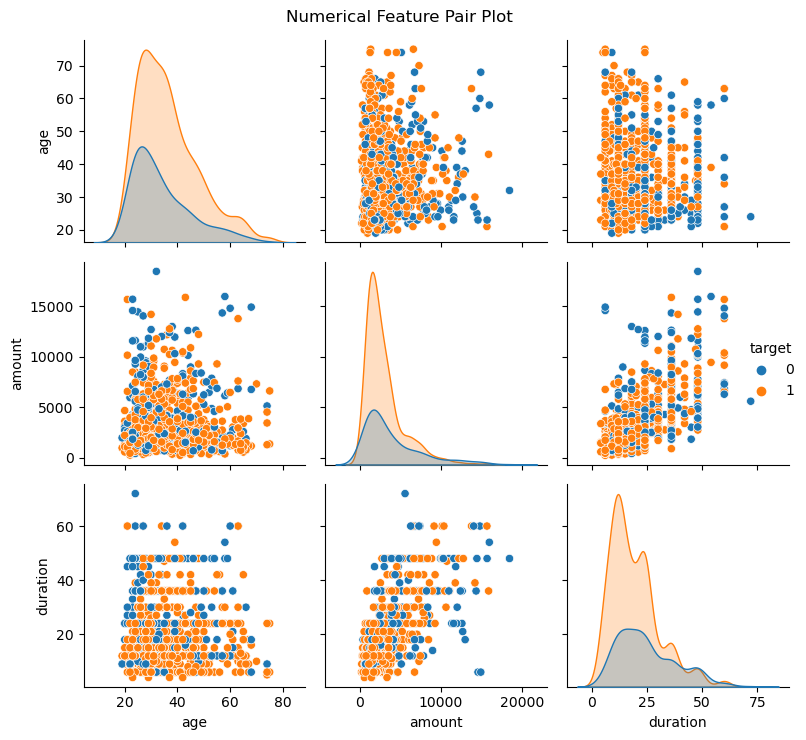

In [14]:
sns.pairplot(dfdata[['age','amount','duration','target']],hue='target')
plt.suptitle('Numerical Feature Pair Plot')
plt.tight_layout()
plt.show()

#### Analyze outliers

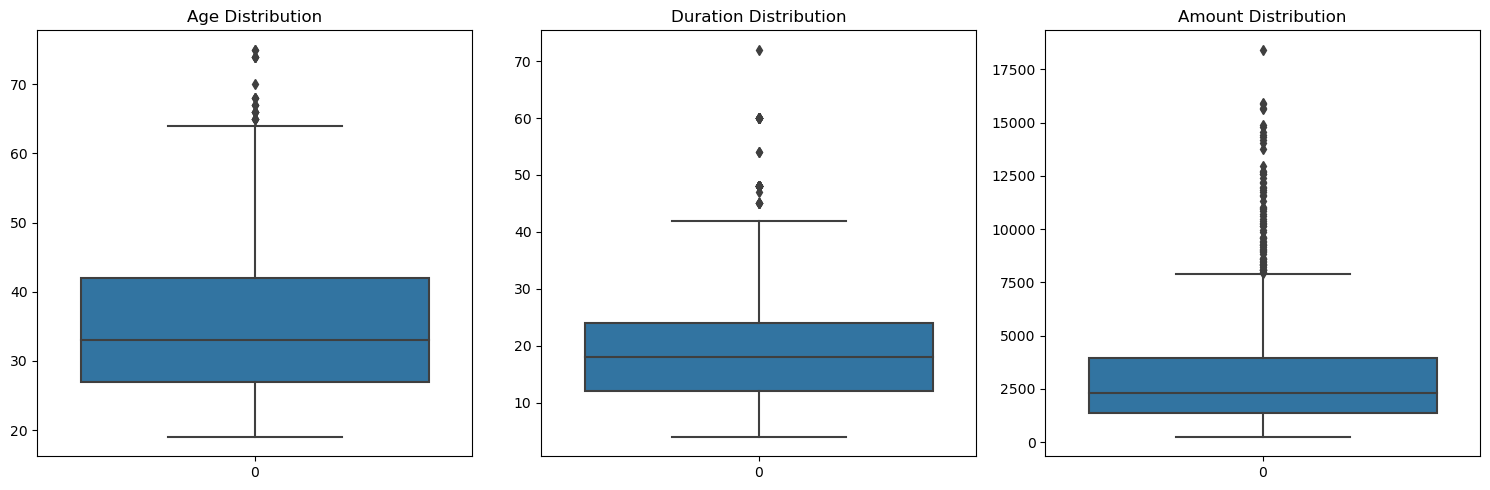

In [15]:
fig, axes = plt.subplots(ncols=3, figsize=(15,5))
sns.boxplot(dfdata['age'], ax=axes[0])
axes[0].set_title('Age Distribution')
sns.boxplot(dfdata['duration'], ax=axes[1])
axes[1].set_title('Duration Distribution')
sns.boxplot(dfdata['amount'], ax=axes[2])
axes[2].set_title('Amount Distribution')

plt.tight_layout()
plt.show()

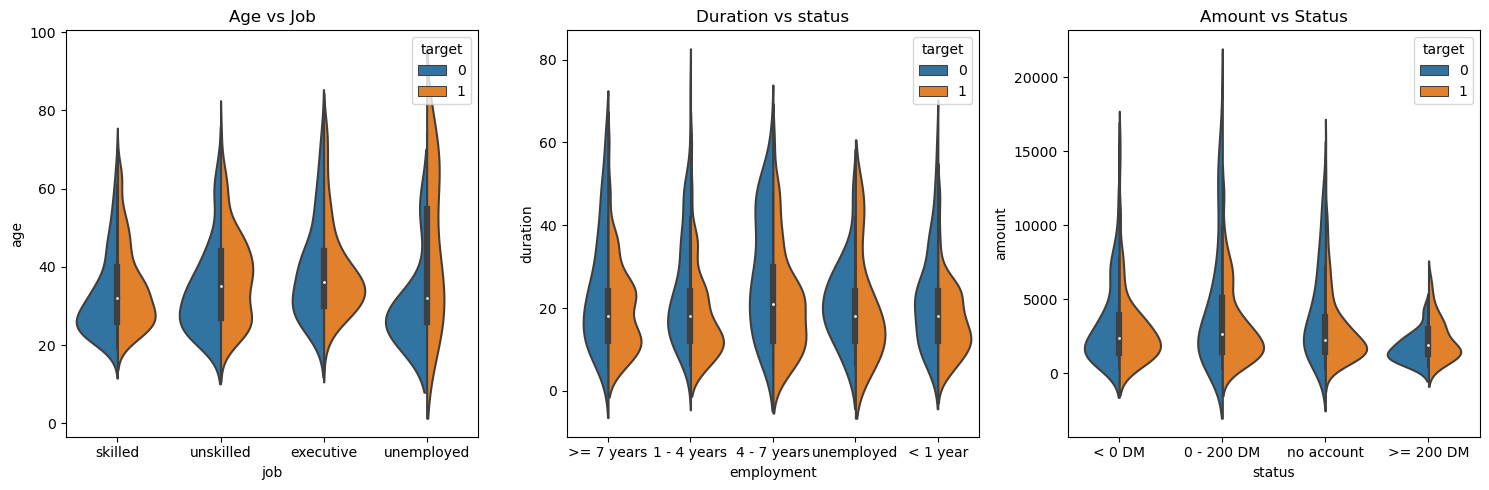

In [16]:
fig, axes = plt.subplots(ncols=3, figsize=(15,5))
sns.violinplot(data=dfdata, x='job',  y='age', hue='target', split=True, ax=axes[0])
axes[0].set_title('Age vs Job')
sns.violinplot(data=dfdata, x='employment',  y='duration', hue='target', split=True, ax=axes[1])
axes[1].set_title('Duration vs status')
sns.violinplot(data=dfdata, x='status',  y='amount', hue='target', split=True, ax=axes[2])
axes[2].set_title('Amount vs Status')

plt.tight_layout()
plt.show()

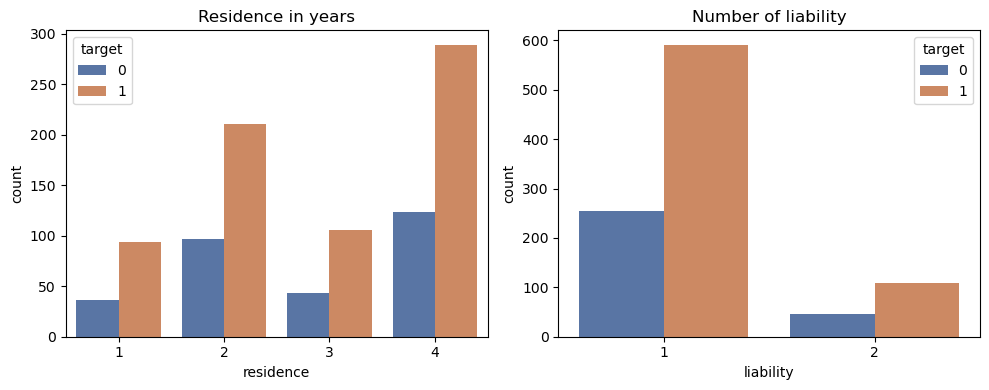

In [17]:
fig, axes = plt.subplots(ncols=2, figsize=(10,4))
sns.countplot(data=dfdata, x='residence', hue='target', palette='deep', ax=axes[0])
axes[0].set_title('Residence in years')
sns.countplot(data=dfdata, x='liability', hue='target', palette='deep', ax=axes[1])
axes[1].set_title('Number of liability')

plt.tight_layout()
plt.show()

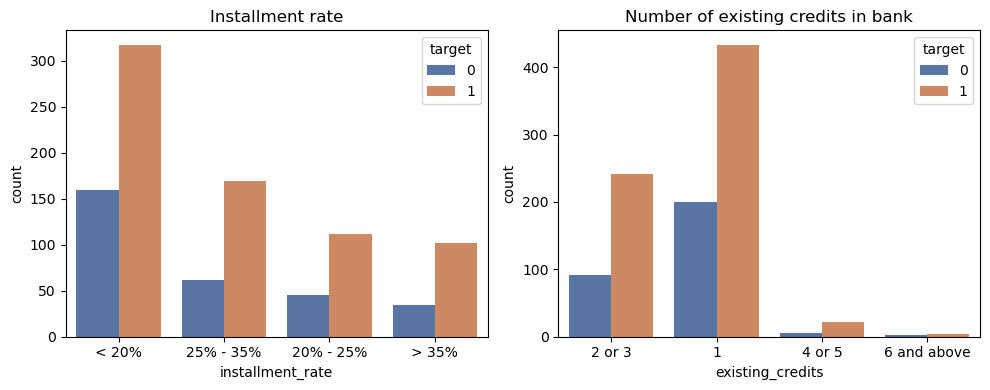

In [18]:
fig, axes = plt.subplots(ncols=2, figsize=(10,4))
sns.countplot(data=dfdata, x='installment_rate', hue='target', palette='deep', ax=axes[0])
axes[0].set_title('Installment rate')
sns.countplot(data=dfdata, x='existing_credits', hue='target', palette='deep', ax=axes[1])
axes[1].set_title('Number of existing credits in bank')

plt.tight_layout()
plt.show()

**Insights** :  
1. The nominal numerical data like **duration**, **amount** and **age** are positively skewed with no apparent outliers
2. The ordinal data like **installment_rate**, **existing_credits**, **residence**, and  **liability** shows that across all variables, there are always more good than bad risks
3. There are slight linear relationship with loan **duration** and **amount** loaned
4. Lower **amount** loaned tends to have a good risk
5. There are **different distribution** among the age of unemployed people, younger unemployed tends to have bad risks while older one have tends to be good risks

In [19]:
dfdata.select_dtypes(include='object').describe()

,status,history,purpose,savings,employment,installment_rate,marriage_sex,guarantor,property,concurrent,housing,existing_credits,job,telephone,foreign
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,5,10,5,5,4,4,3,4,3,3,4,4,2,2
top,no account,existing credits paid,radio/television,< 100 DM,1 - 4 years,< 20%,male-single,none,other,none,own,1,skilled,none,yes
freq,394,530,280,603,339,476,548,907,332,814,713,633,630,596,963


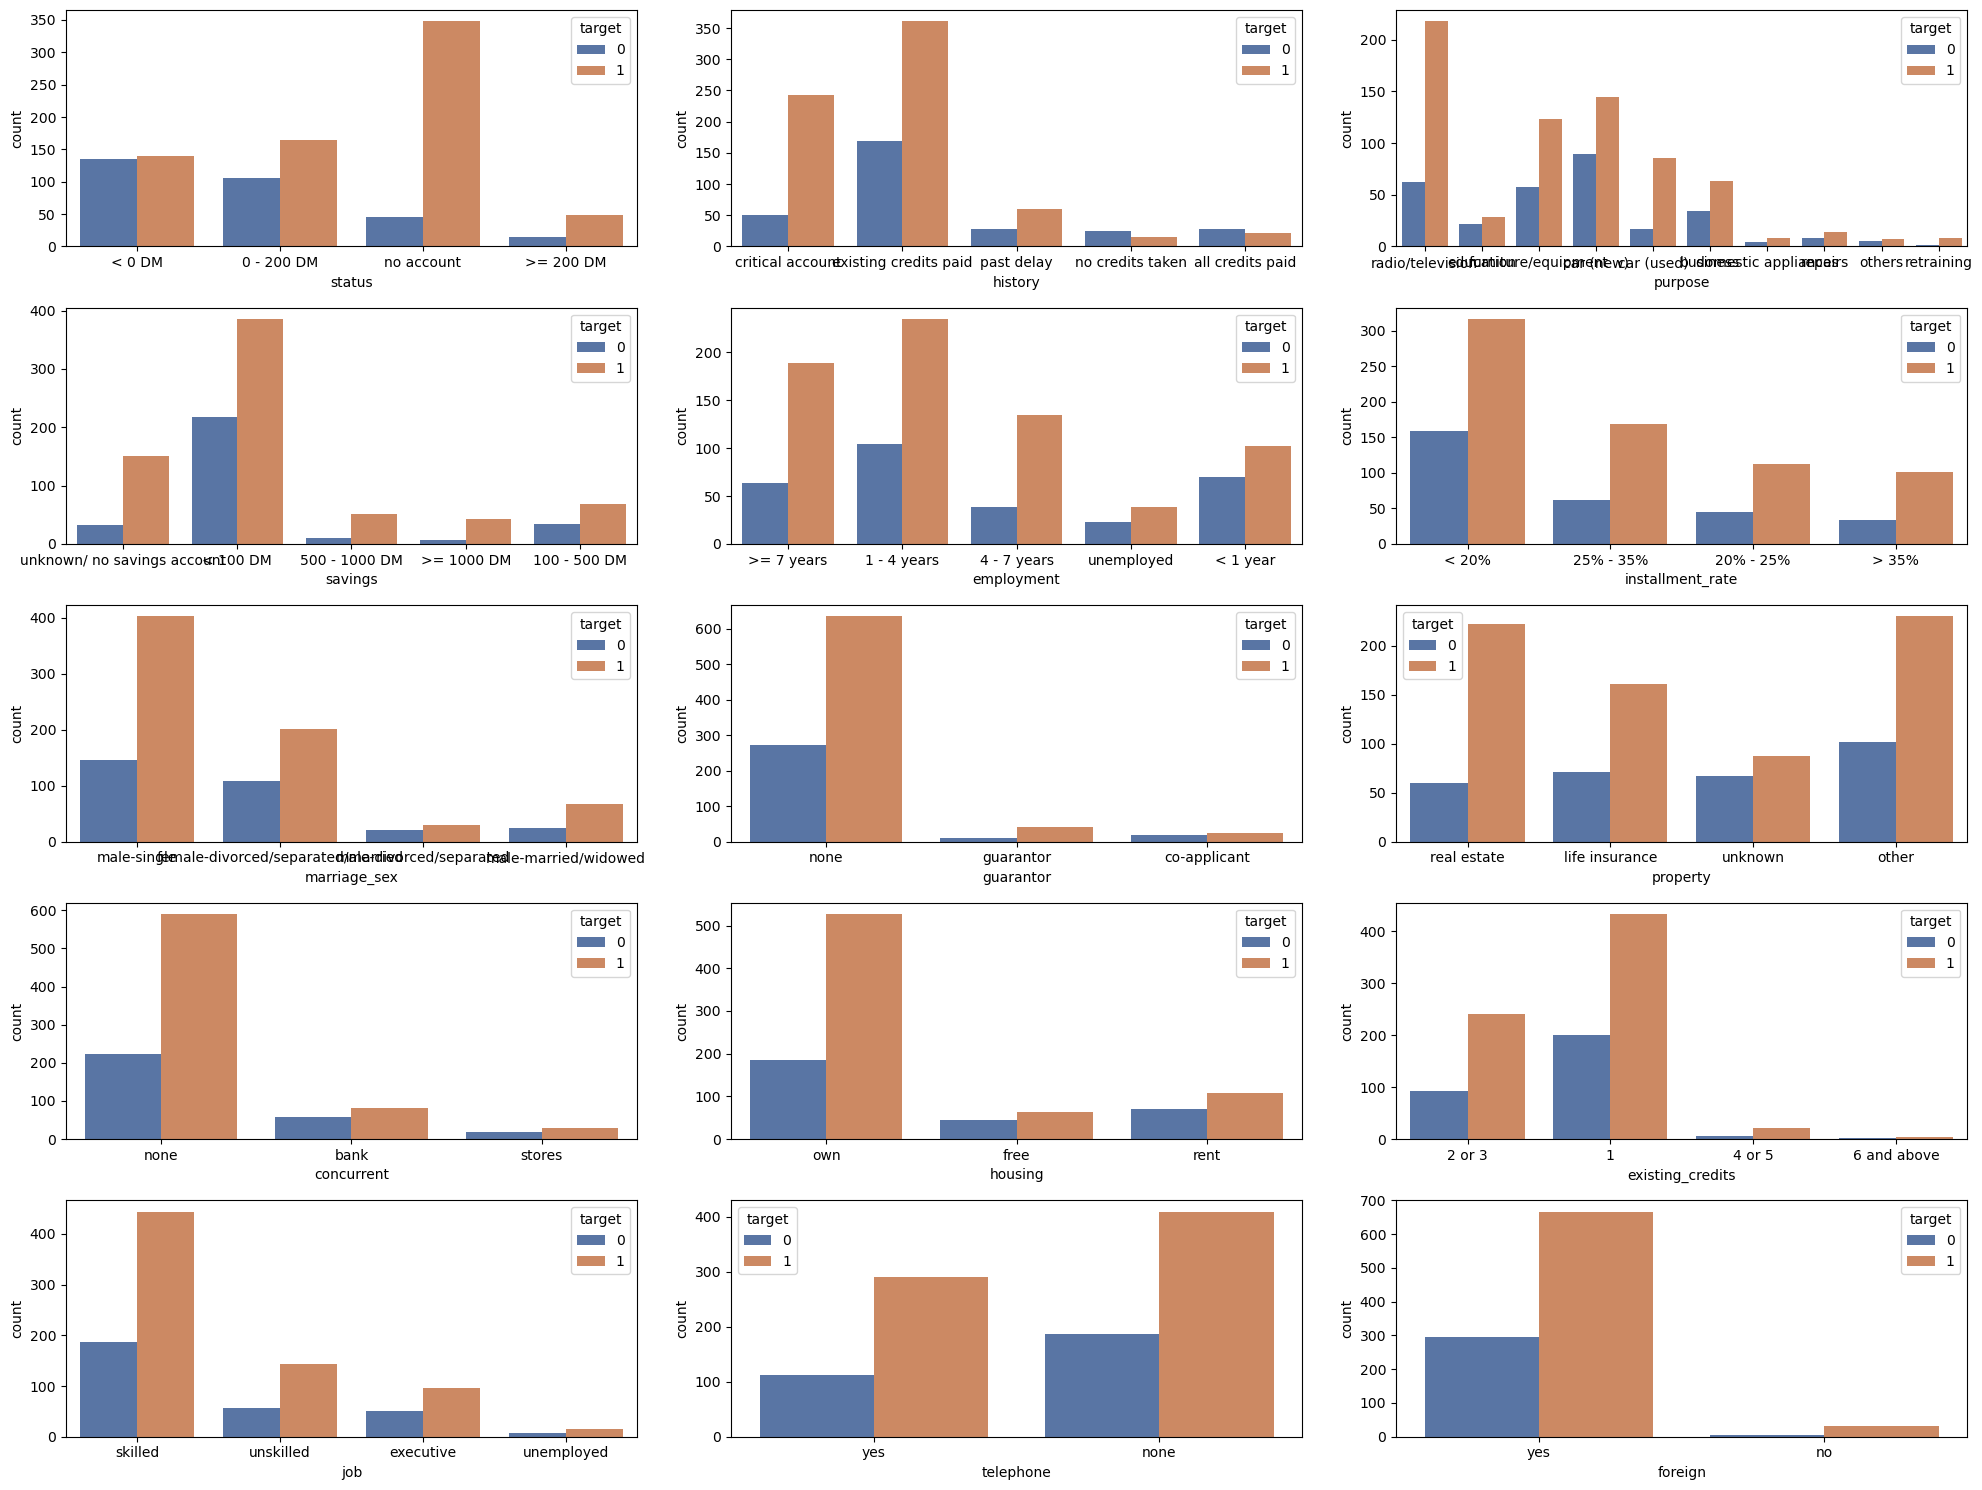

In [20]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20,15))
for i,column in enumerate(dfdata.select_dtypes(include='object')):
    sns.countplot(data=dfdata, x=column, hue='target', palette='deep', ax=axes.flatten()[i])

plt.tight_layout()
plt.show()

**Insights** :  
1. The data are split into **70%** good and **30%** bad credit risks
2. guarantor and foreign have **highly imbalanced** data, with over **90%** have no guarantors and more than **90%** data are foreigners  
3. There are no obvious feature that shows tendency for bad credit risks, this shows the target is uniformly imbalance 
4. the marriage_sex column can be split into both marital status and sex columns

### 1. Feature Engineering
We will further analyze each column and engineer features that might improve our classifier

In [21]:
dfdata.head(5)

,status,duration,history,purpose,amount,savings,employment,installment_rate,marriage_sex,guarantor,...,property,age,concurrent,housing,existing_credits,job,liability,telephone,foreign,target
0,< 0 DM,6,critical account,radio/television,1169,unknown/ no savings account,>= 7 years,< 20%,male-single,none,...,real estate,67,none,own,2 or 3,skilled,1,yes,yes,1
1,0 - 200 DM,48,existing credits paid,radio/television,5951,< 100 DM,1 - 4 years,25% - 35%,female-divorced/separated/married,none,...,real estate,22,none,own,1,skilled,1,none,yes,0
2,no account,12,critical account,education,2096,< 100 DM,4 - 7 years,25% - 35%,male-single,none,...,real estate,49,none,own,1,unskilled,2,none,yes,1
3,< 0 DM,42,existing credits paid,furniture/equipment,7882,< 100 DM,4 - 7 years,25% - 35%,male-single,guarantor,...,life insurance,45,none,free,1,skilled,2,none,yes,1
4,< 0 DM,24,past delay,car (new),4870,< 100 DM,1 - 4 years,20% - 25%,male-single,none,...,unknown,53,none,free,2 or 3,skilled,2,none,yes,0


### Marriage_Sex seperation
We will seperate the **marriage_sex** feature into two seperate feature called **marriage** and **sex**

In [22]:
dfdata['sex'] = dfdata['marriage_sex'].apply(lambda x: x.split('-')[0])
dfdata['marriage'] = dfdata['marriage_sex'].apply(lambda x: x.split('-')[1])

remove redundancy by setting the possible value for marriage as **single** and **married**

In [23]:
dfdata['marriage'].replace(['divorced/separated/married','married/widowed','divorced/separated'], 'married', inplace=True)

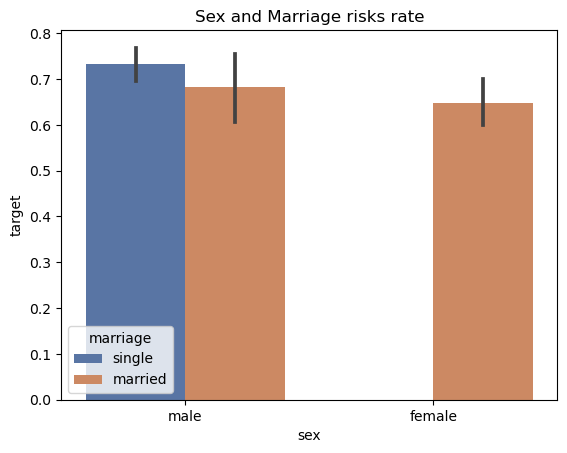

In [24]:
sns.barplot(data=dfdata, x='sex', y='target', hue='marriage', palette='deep')
plt.title('Sex and Marriage risks rate')
plt.show()

We can see that there are **no single female** in our entry

### Label encoding for ordinal data
some categorical data with an ordinal data such as **status**, **savings**, **job**, **employment**, **installment_rate**, and **existing_credits**  
the attributes currently considered as categorical data which have no relation from one value to another, but we can take example of **existing_credits** that the value **1** and **2 or 3** are closer than **1** and **above 6**. to capture this we will use label encoding to replace the value with integer in a determined order.  
Additionaly, **binary** data such as **Sex** and **Marriage** can be encoded into 0 and 1.

In [25]:
sex_map = {'male':1, 'female':0}
marriage_map = {'married':1, 'single':0}

sex : 0 for **female** and 1 for **male**  
marriage : 0 for **single** and 1 for **married**

In [26]:
dfdata['sex'].replace(sex_map, inplace=True)
dfdata['marriage'].replace(marriage_map, inplace=True)

#### Current Status

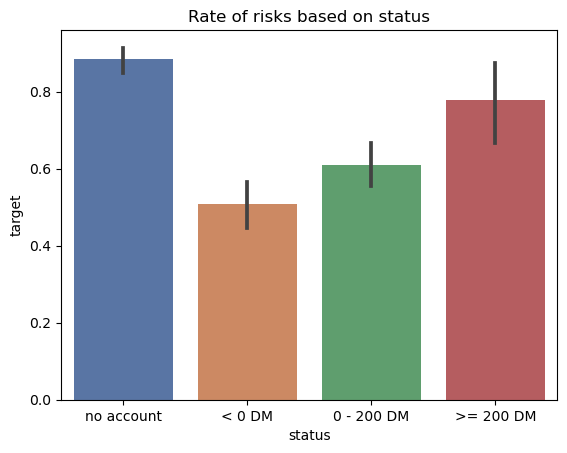

In [27]:
sns.barplot(data=dfdata,x='status',y='target',palette='deep', order=dfdata['status'].value_counts().index)
plt.title('Rate of risks based on status')
plt.show()

we can see that  the **less money** a person have its more likely to be a bad risks, while a person with **no account** tends to be a good risks.

In [28]:
status_map = {'no account': 0, '< 0 DM': 1, '0 - 200 DM': 2, '>= 200 DM': 3}
dfdata['status'].replace(status_map, inplace=True)

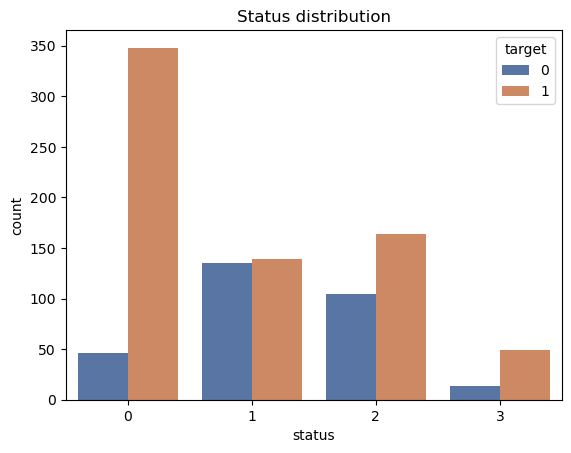

In [29]:
sns.countplot(data=dfdata,x='status',hue='target',palette='deep')
plt.title('Status distribution')
plt.show()

#### Current Savings

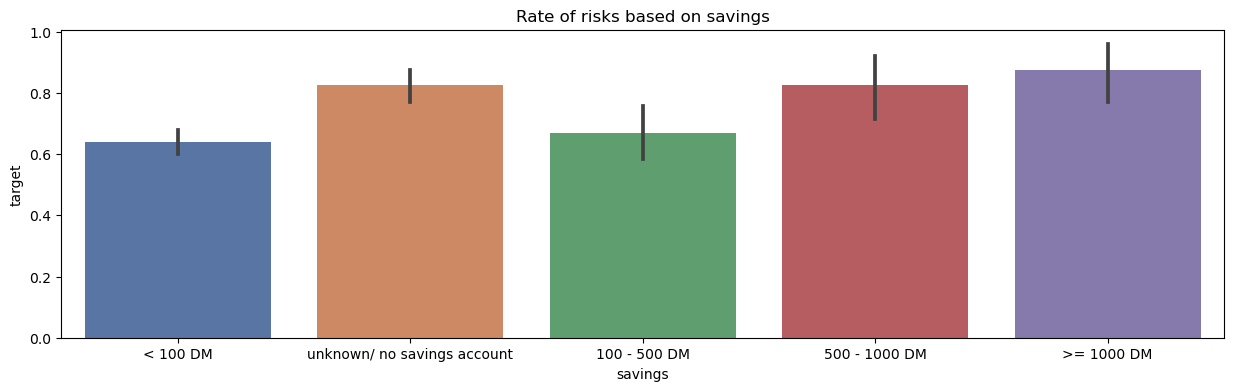

In [30]:
plt.figure(figsize=(15,4))
sns.barplot(data=dfdata,x='savings',y='target', palette='deep', order=dfdata['savings'].value_counts().index)
plt.title('Rate of risks based on savings')
plt.show()

We can see that **higher savings** have tendency to be good risks. Another thing to note is that there are **less than 100 entries** for value **500 - 1000 DM** and **>= 1000 DM**, we can combine this two value into **>= 500 value**

In [31]:
savings_map = {'unknown/ no savings account': 0, '< 100 DM': 1, '100 - 500 DM': 2, '500 - 1000 DM': 3, '>= 1000 DM' : 3 }
dfdata['savings'].replace(savings_map, inplace=True)

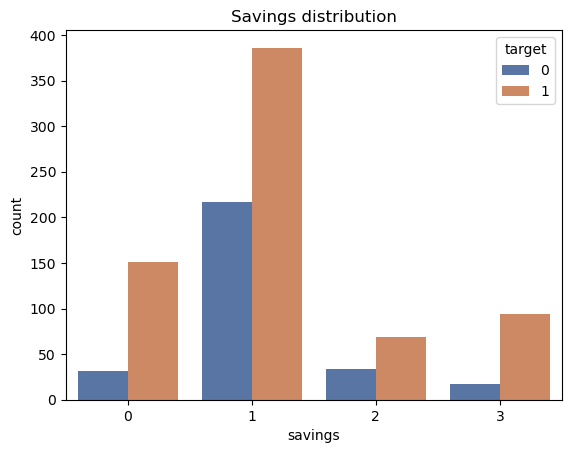

In [32]:
sns.countplot(data=dfdata,x='savings',hue='target', palette='deep')
plt.title('Savings distribution')
plt.show()

#### Past and current job

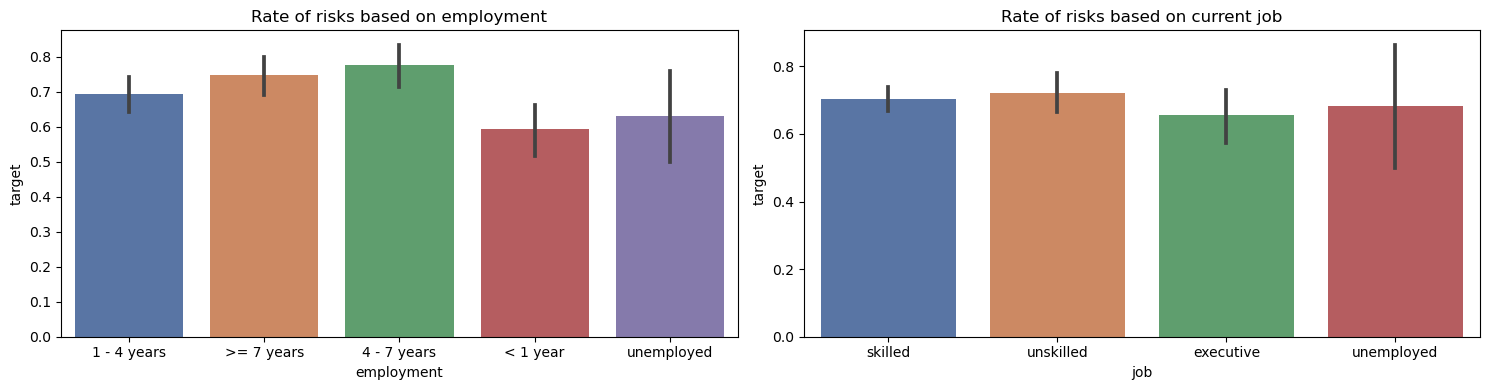

In [33]:
fig, axes = plt.subplots(ncols=2, figsize=(15,4))
sns.barplot(data=dfdata,x='employment',y='target', palette='deep', order=dfdata['employment'].value_counts().index, ax=axes[0])
axes[0].set_title('Rate of risks based on employment')
sns.barplot(data=dfdata,x='job',y='target', palette='deep', order=dfdata['job'].value_counts().index, ax=axes[1])
axes[1].set_title('Rate of risks based on current job')

plt.tight_layout()
plt.show()

Again, we can see that **higher employment experience** and **job position** have tendency to be a good risks, we can consider unemployed as 0 year of employment. Same with employment, the job feature can be mapped into values.

In [34]:
employment_map = {'unemployed': 0, '< 1 year': 1, '1 - 4 years': 2, '4 - 7 years': 3, '>= 7 years' : 4 }
job_map = {'unemployed': 0, 'unskilled': 1, 'skilled': 2, 'executive': 3}
dfdata['employment'].replace(employment_map, inplace=True)
dfdata['job'].replace(job_map, inplace=True)
dfdata['job'].replace(job_map, inplace=True)

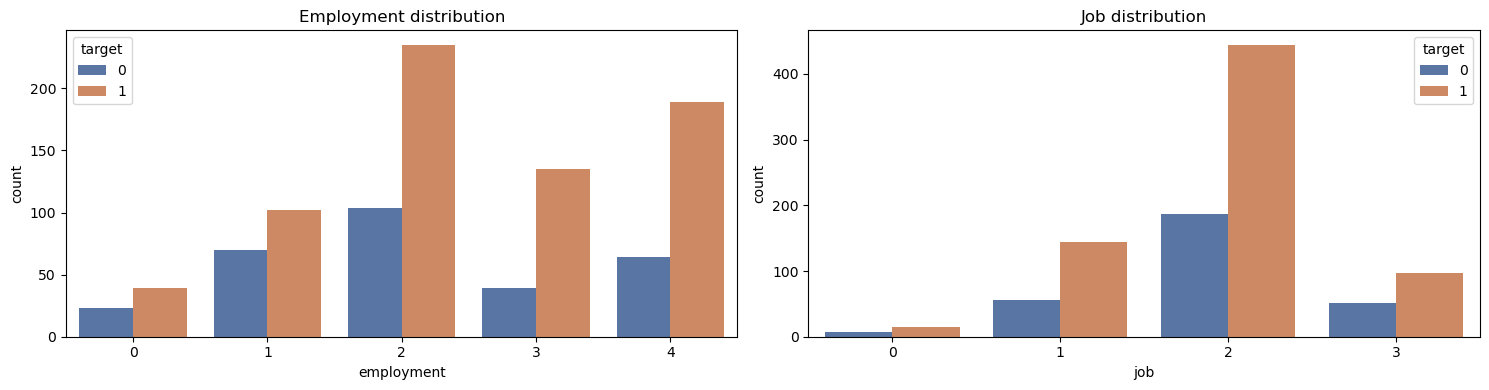

In [35]:
fig, axes = plt.subplots(ncols=2, figsize=(15,4))
sns.countplot(data=dfdata,x='employment',hue='target', palette='deep', ax=axes[0])
axes[0].set_title('Employment distribution')
sns.countplot(data=dfdata,x='job',hue='target', palette='deep', ax=axes[1])
axes[1].set_title('Job distribution')

plt.tight_layout()
plt.show()

#### Installment rate and number of existing credits

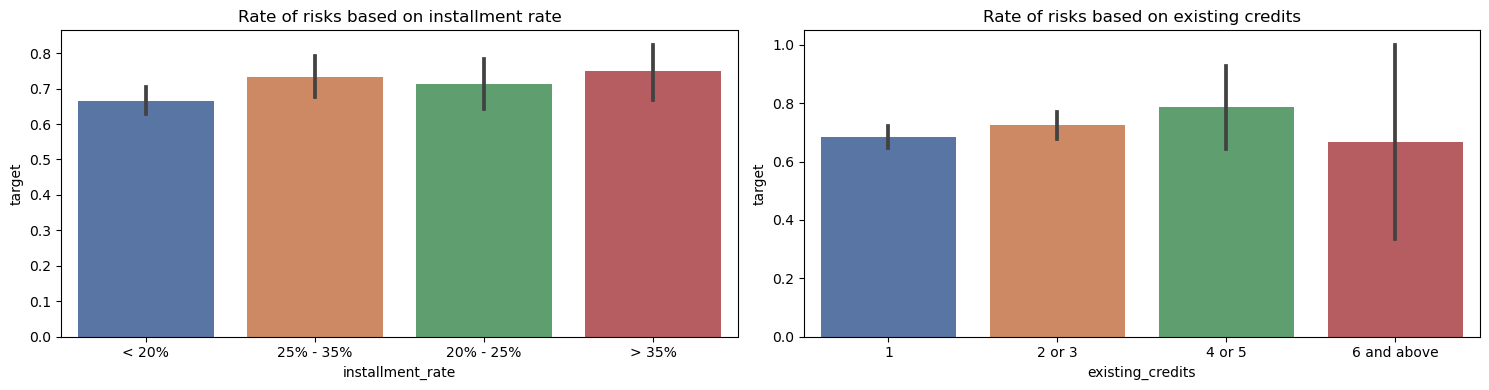

In [36]:
fig, axes = plt.subplots(ncols=2, figsize=(15,4))
sns.barplot(data=dfdata, x='installment_rate', y='target', order=dfdata['installment_rate'].value_counts().index, ax=axes[0], palette='deep')
axes[0].set_title('Rate of risks based on installment rate')
sns.barplot(data=dfdata, x='existing_credits', y='target', order=dfdata['existing_credits'].value_counts().index, ax=axes[1], palette='deep')
axes[1].set_title('Rate of risks based on existing credits')

plt.tight_layout()
plt.show()

We can see that **lower installment rate** and the **number of credits**, the higher chance to be a bad risks

In [37]:
installment_rate_map = {'< 20%': 0, '20% - 25%': 1, '25% - 35%': 2, '> 35%': 3}
exisitng_credits_map = {'1': 0, '2 or 3': 1, '4 or 5': 1, '6 and above': 1}
dfdata['installment_rate'].replace(installment_rate_map, inplace=True)
dfdata['existing_credits'].replace(exisitng_credits_map, inplace=True)

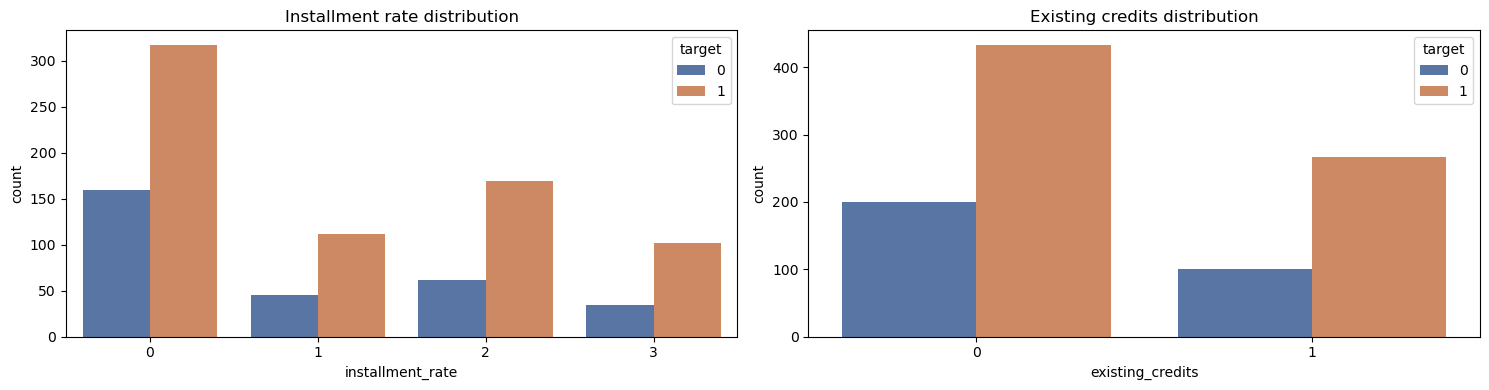

In [38]:
fig, axes = plt.subplots(ncols=2, figsize=(15,4))
sns.countplot(data=dfdata, x='installment_rate', hue='target', ax=axes[0], palette='deep')
axes[0].set_title('Installment rate distribution')
sns.countplot(data=dfdata, x='existing_credits', hue='target', ax=axes[1], palette='deep')
axes[1].set_title('Existing credits distribution')

plt.tight_layout()
plt.show()

### Categorical data analysis

In [39]:
dfdata.select_dtypes(include='O')

,history,purpose,marriage_sex,guarantor,property,concurrent,housing,telephone,foreign
0,critical account,radio/television,male-single,none,real estate,none,own,yes,yes
1,existing credits paid,radio/television,female-divorced/separated/married,none,real estate,none,own,none,yes
2,critical account,education,male-single,none,real estate,none,own,none,yes
3,existing credits paid,furniture/equipment,male-single,guarantor,life insurance,none,free,none,yes
4,past delay,car (new),male-single,none,unknown,none,free,none,yes
...,...,...,...,...,...,...,...,...,...
995,existing credits paid,furniture/equipment,female-divorced/separated/married,none,real estate,none,own,none,yes
996,existing credits paid,car (used),male-divorced/separated,none,life insurance,none,own,yes,yes
997,existing credits paid,radio/television,male-single,none,other,none,own,none,yes
998,existing credits paid,radio/television,male-single,none,unknown,none,free,yes,yes


#### Credit purpose

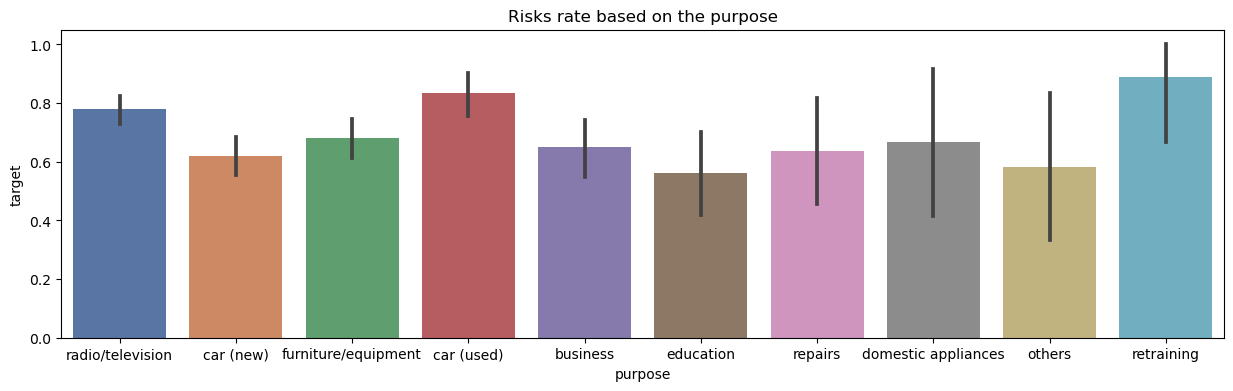

In [40]:
plt.figure(figsize=(15,4))
sns.barplot(data=dfdata, x='purpose', y='target', order=dfdata['purpose'].value_counts().index, palette='deep')
plt.title('Risks rate based on the purpose')
plt.show()

We can combine several value into one to avoid low representation fo the data. Reference links : https://online.stat.psu.edu/stat508/resources/analysis/gcd/gcd.1

In [41]:
purpose_map = {'radio/television': 'furniture', 'car (new)': 'new car', 
               'furniture/equipment': 'furniture', 'car (used)': 'used car', 
               'business': 'others', 'education':'others', 'repairs':'others', 
               'domestic appliances':'furniture', 'others':'others', 'retraining':'business'}

In [42]:
dfdata['purpose'].replace(purpose_map, inplace=True)

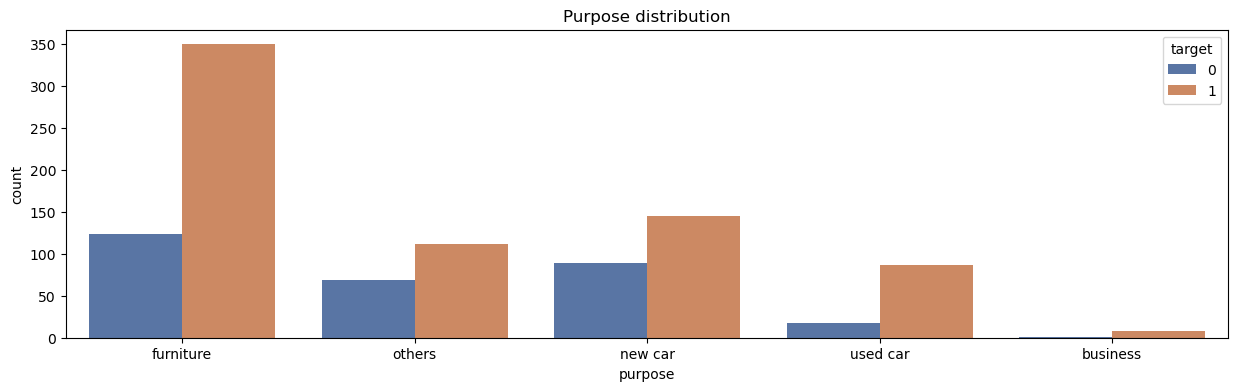

In [43]:
plt.figure(figsize=(15,4))
sns.countplot(data=dfdata, x='purpose', hue='target', palette='deep')
plt.title('Purpose distribution')
plt.show()

#### Credit history and property

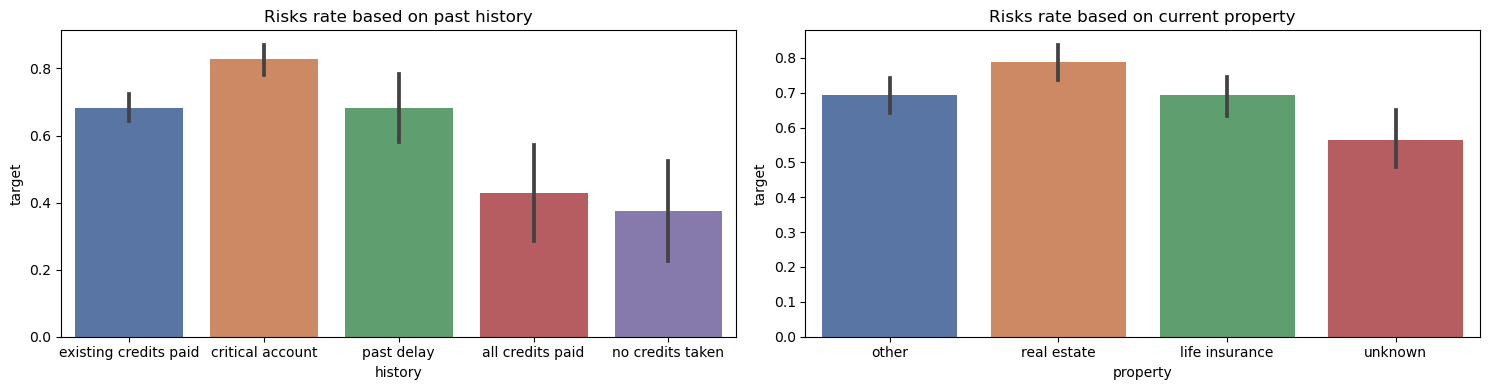

In [44]:
fig, axes = plt.subplots(ncols=2, figsize=(15,4))
sns.barplot(data=dfdata, x='history', y='target', ax=axes[0], order=dfdata['history'].value_counts().index, palette='deep')
axes[0].set_title('Risks rate based on past history')
sns.barplot(data=dfdata, x='property', y='target', ax=axes[1], order=dfdata['property'].value_counts().index, palette='deep')
axes[1].set_title('Risks rate based on current property')

plt.tight_layout()
plt.show()

Again, we can combine several similiar value into one. We leave the property feature as is.

In [45]:
history_map = {'all credits paid': 'credits paid', 'critical account': 'critical account', 
               'existing credits paid': 'credits paid', 'past delay': 'credits paid', 'no credits taken':'no credits taken'}

In [46]:
dfdata['history'].replace(history_map, inplace=True)

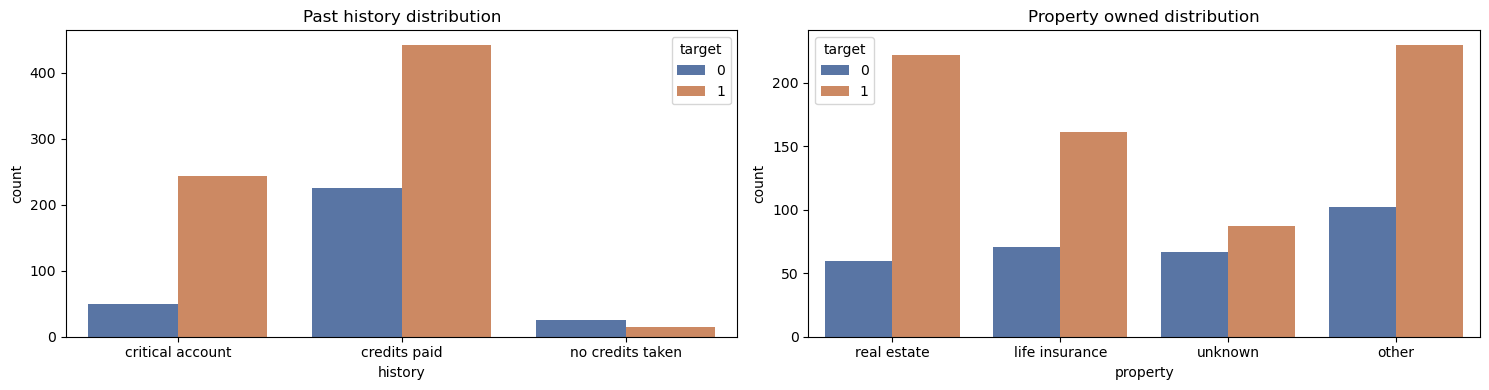

In [47]:
fig, axes = plt.subplots(ncols=2, figsize=(15,4))
sns.countplot(data=dfdata, x='history', hue='target', ax=axes[0], palette='deep')
axes[0].set_title('Past history distribution')
sns.countplot(data=dfdata, x='property', hue='target', ax=axes[1], palette='deep')
axes[1].set_title('Property owned distribution')

plt.tight_layout()
plt.show()

#### Guarantor, Concurrent, and Housing

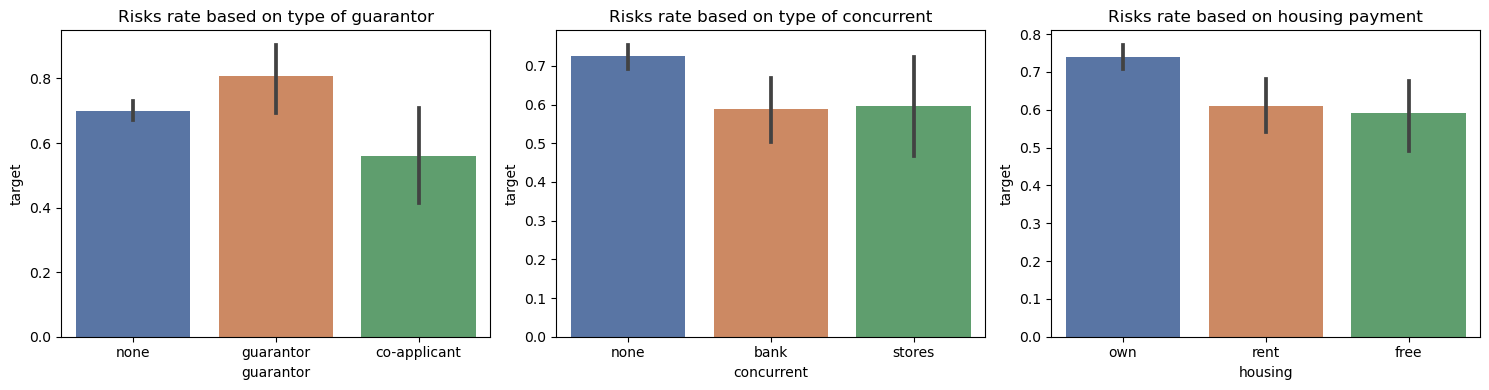

In [48]:
fig, axes = plt.subplots(ncols=3, figsize=(15,4))
sns.barplot(data=dfdata, x='guarantor', y='target', ax=axes[0], order=dfdata['guarantor'].value_counts().index,  palette='deep')
axes[0].set_title('Risks rate based on type of guarantor')
sns.barplot(data=dfdata, x='concurrent', y='target', ax=axes[1], order=dfdata['concurrent'].value_counts().index, palette='deep')
axes[1].set_title('Risks rate based on type of concurrent')
sns.barplot(data=dfdata, x='housing', y='target', ax=axes[2], order=dfdata['housing'].value_counts().index, palette='deep')
axes[2].set_title('Risks rate based on housing payment')
plt.tight_layout()
plt.show()

Some value in the features dont have much entries, we can combine them if necessary.

In [49]:
guarantor_map = {'none': 0, 'guarantor': 1, 'co-applicant': 1}
concurrent_map = {'none': 0, 'bank': 1, 'stores': 1}
housing_map  = {'own':1, 'free':1, 'rent':0}

guarantor : 0 for **none** and 1 for **guarantor/co-applicant**  
concurrent : 0 for **none** and 1 for **bank/stores**  
housing : 0 if **rent** and 1 for **own/free**

In [50]:
dfdata['guarantor'].replace(guarantor_map, inplace=True)
dfdata['concurrent'].replace(concurrent_map, inplace=True)
dfdata['housing'].replace(housing_map, inplace=True)

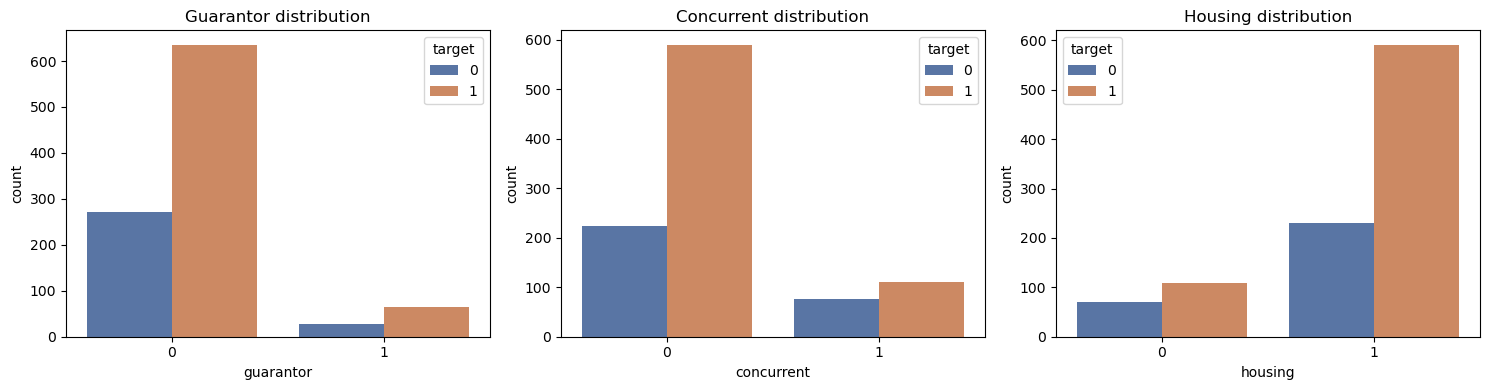

In [51]:
fig, axes = plt.subplots(ncols=3, figsize=(15,4))
sns.countplot(data=dfdata, x='guarantor', hue='target', ax=axes[0], palette='deep')
axes[0].set_title('Guarantor distribution')
sns.countplot(data=dfdata, x='concurrent', hue='target', ax=axes[1], palette='deep')
axes[1].set_title('Concurrent distribution')
sns.countplot(data=dfdata, x='housing', hue='target', ax=axes[2], palette='deep')
axes[2].set_title('Housing distribution')

plt.tight_layout()
plt.show()

#### Telephone and Foreign status

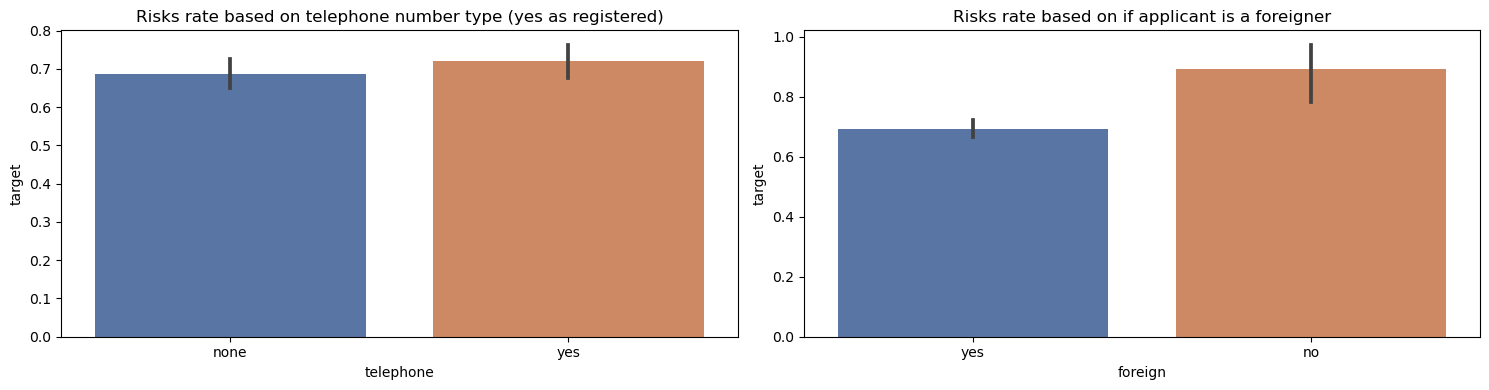

In [52]:
fig, axes = plt.subplots(ncols=2, figsize=(15,4))
sns.barplot(data=dfdata, x='telephone', y='target', ax=axes[0], order=dfdata['telephone'].value_counts().index, palette='deep')
axes[0].set_title('Risks rate based on telephone number type (yes as registered)')
sns.barplot(data=dfdata, x='foreign', y='target', ax=axes[1], order=dfdata['foreign'].value_counts().index, palette='deep')
axes[1].set_title('Risks rate based on if applicant is a foreigner')

plt.tight_layout()
plt.show()

Same case as before, some values in the features dont have much entries, we can combine them if necessary.

In [53]:
telephone_map = {'none': 0, 'yes': 1}
foreign_map = {'yes': 0, 'no': 1}

telephone : 0 for **none** and 1 for **yes**  
foreign : 0 for **no** and 1 for **yes**

In [54]:
dfdata['telephone'].replace(telephone_map, inplace=True)
dfdata['foreign'].replace(foreign_map, inplace=True)

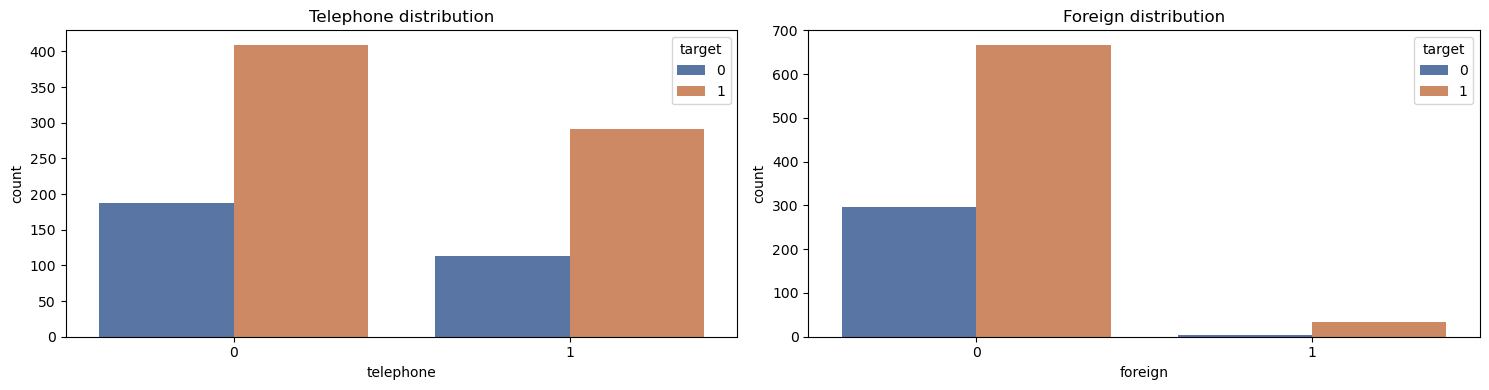

In [55]:
fig, axes = plt.subplots(ncols=2, figsize=(15,4))
sns.countplot(data=dfdata, x='telephone', hue='target', ax=axes[0], palette='deep')
axes[0].set_title('Telephone distribution')
sns.countplot(data=dfdata, x='foreign', hue='target', ax=axes[1], palette='deep')
axes[1].set_title('Foreign distribution')

plt.tight_layout()
plt.show()

### Perform one hot encoding for categorical data  
the column which we will apply OHE is the remaining categorical data.

In [56]:
dfdata.drop('marriage_sex',axis=1,inplace=True)

In [57]:
dfdata.select_dtypes(include='O')

,history,purpose,property
0,critical account,furniture,real estate
1,credits paid,furniture,real estate
2,critical account,others,real estate
3,credits paid,furniture,life insurance
4,credits paid,new car,unknown
...,...,...,...
995,credits paid,furniture,real estate
996,credits paid,used car,life insurance
997,credits paid,furniture,other
998,credits paid,furniture,unknown


In [58]:
dfdata.select_dtypes(include='O').columns.tolist()

['history', 'purpose', 'property']

In [59]:
dfdata_clean = pd.get_dummies(dfdata, dfdata.select_dtypes(include='O').columns.tolist())
dfdata_clean.head()

,status,duration,amount,savings,employment,installment_rate,guarantor,residence,age,concurrent,...,history_no credits taken,purpose_business,purpose_furniture,purpose_new car,purpose_others,purpose_used car,property_life insurance,property_other,property_real estate,property_unknown
0,1,6,1169,0,4,0,0,4,67,0,...,0,0,1,0,0,0,0,0,1,0
1,2,48,5951,1,2,2,0,2,22,0,...,0,0,1,0,0,0,0,0,1,0
2,0,12,2096,1,3,2,0,3,49,0,...,0,0,0,0,1,0,0,0,1,0
3,1,42,7882,1,3,2,1,4,45,0,...,0,0,1,0,0,0,1,0,0,0
4,1,24,4870,1,2,1,0,4,53,0,...,0,0,0,1,0,0,0,0,0,1


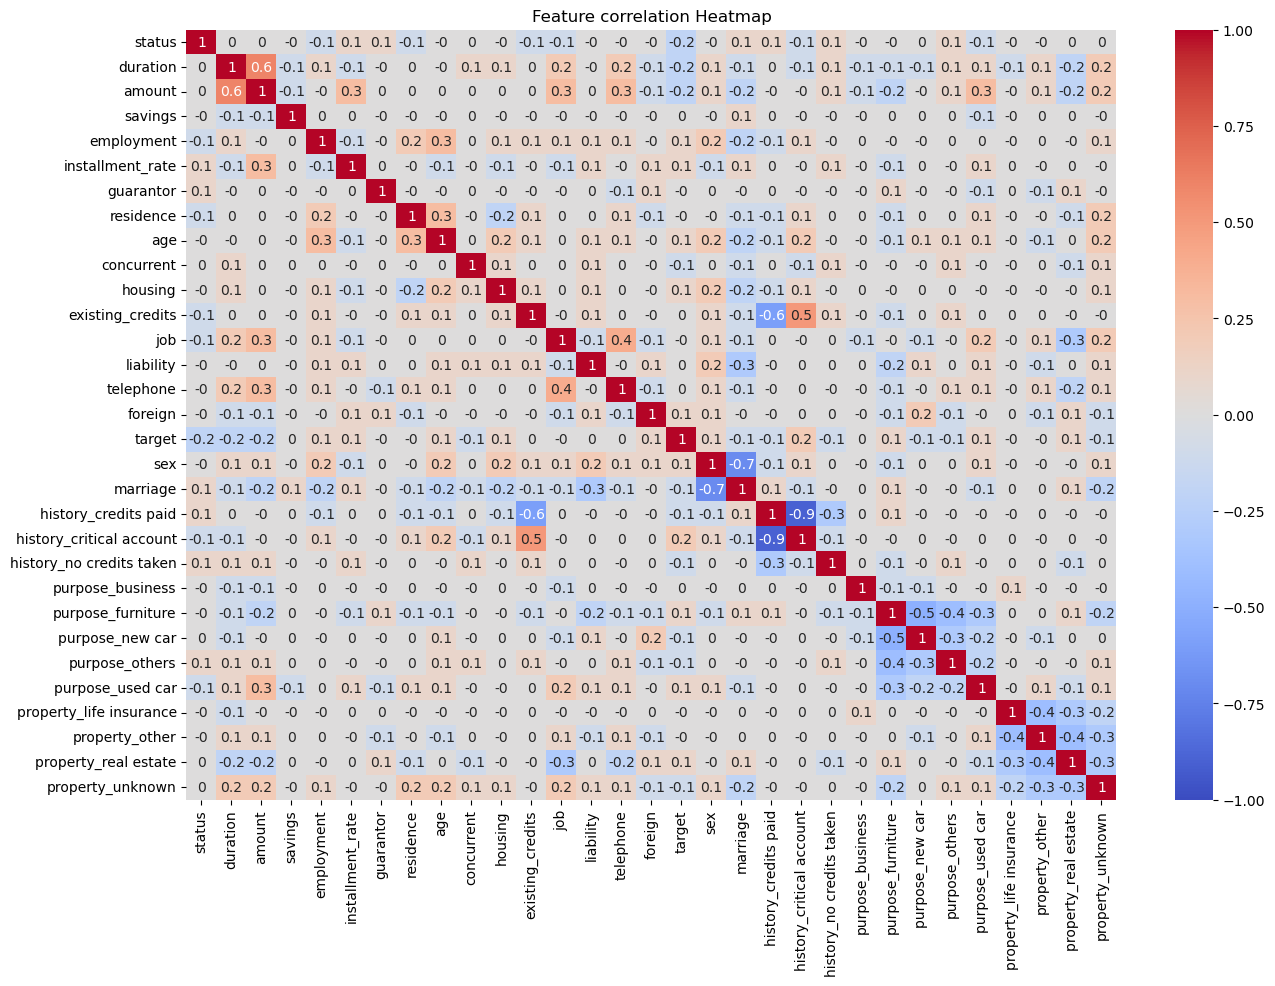

In [60]:
plt.figure(figsize=(15, 10))
sns.heatmap(dfdata_clean.corr().round(1), annot=True, vmin=-1, vmax=1, cmap='coolwarm')
plt.title('Feature correlation Heatmap')
plt.show()

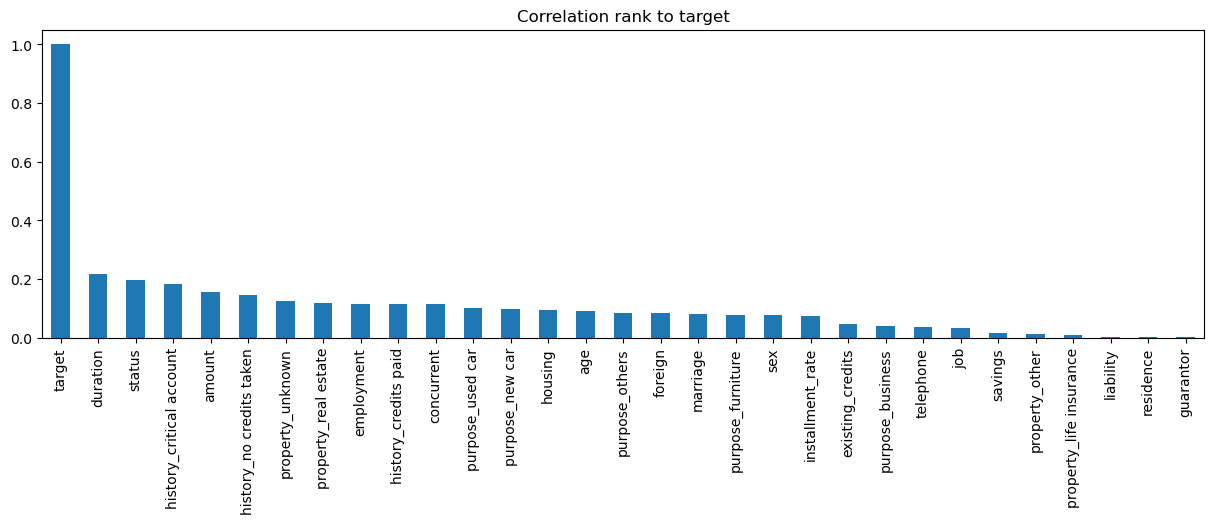

In [61]:
plt.figure(figsize=(15,4))
dfdata_clean.corr()['target'].abs().sort_values(ascending=False).plot(kind='bar')
plt.title('Correlation rank to target')
plt.show()

We can see that the top features to predict the target value are :
1. Loan Duration with **21.49%**
2. Current Status with **19.77%**
3. Past Critical Account with **18.17%**
4. Current Savings with **17.91%**
5. Loan Amount with **15.47%**

### Feature correlation with Mutual Information

In [62]:
from sklearn.feature_selection import mutual_info_classif

In [63]:
X = dfdata_clean
y = X.pop('target')
mi_scores = mutual_info_classif(X, y)

In [64]:
dfscores = pd.concat([pd.Series(X.columns), pd.Series(mi_scores)], axis=1).sort_values(by=1, ascending=False)
dfscores = dfscores.set_index(0)

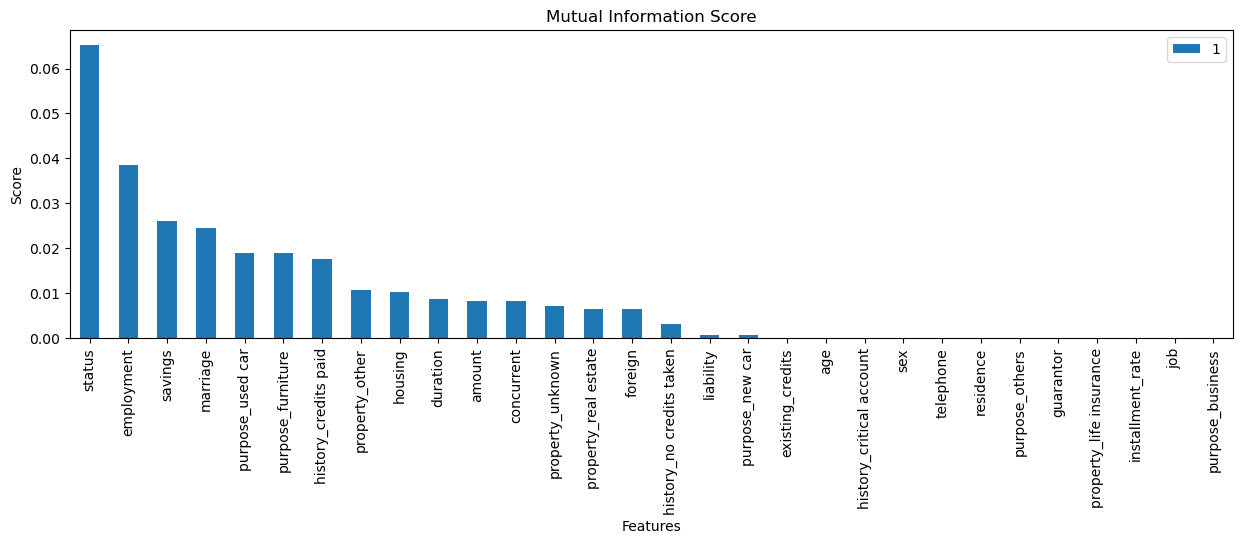

In [65]:
dfscores.plot(kind='bar', figsize=(15, 4))
plt.xlabel('Features')
plt.ylabel('Score')
plt.title('Mutual Information Score')
plt.show()

We can see different results using Mutual Information :
1. Current Status with **71.92%**
2. Current Savings with **47.35%**
3. Past Critical Account with **46.67%**
4. Past Credits Paid with **41.03%**
5. Loan Duration with **32.47%**